In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set()

In [2]:
train_url = '/kaggle/input/titanic/train.csv'
test_url = '/kaggle/input/titanic/test.csv'
train = pd.read_csv(train_url, index_col = 'PassengerId')
test = pd.read_csv(test_url, index_col = 'PassengerId')

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 11)

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

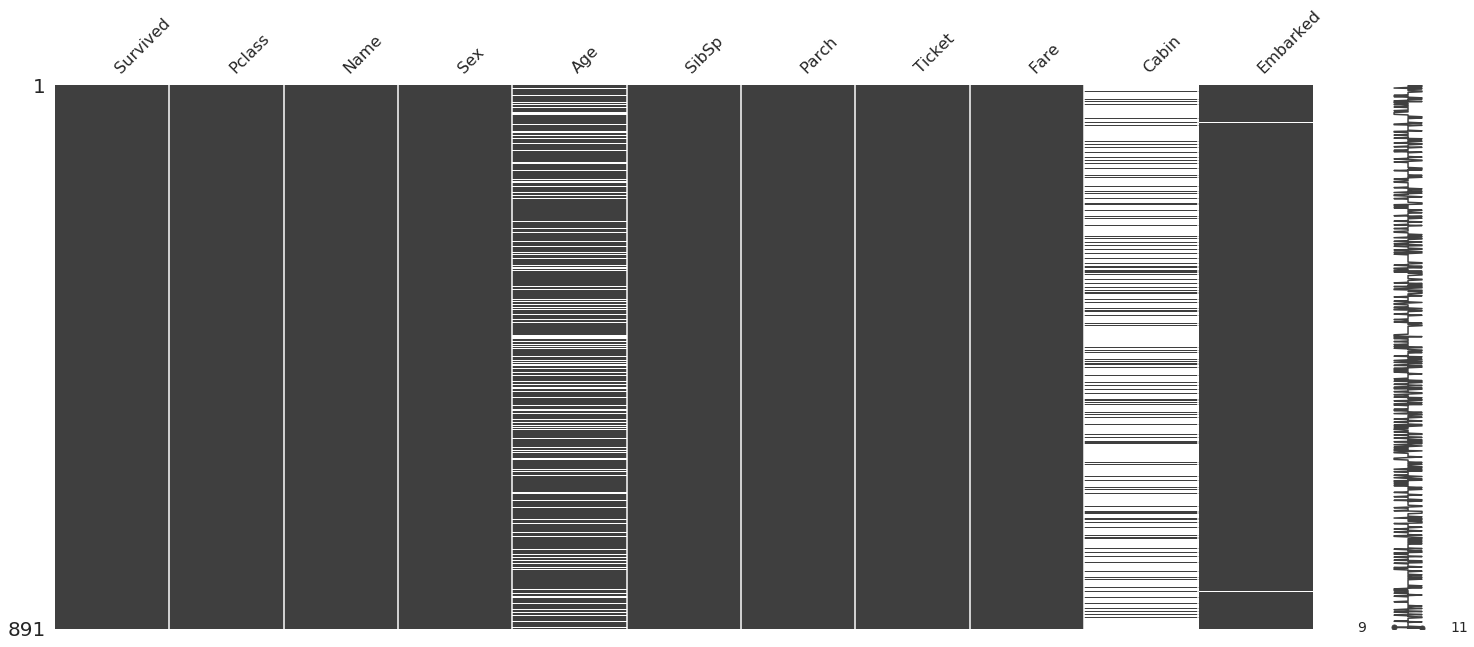

In [11]:
import missingno as mn
mn.matrix(train)

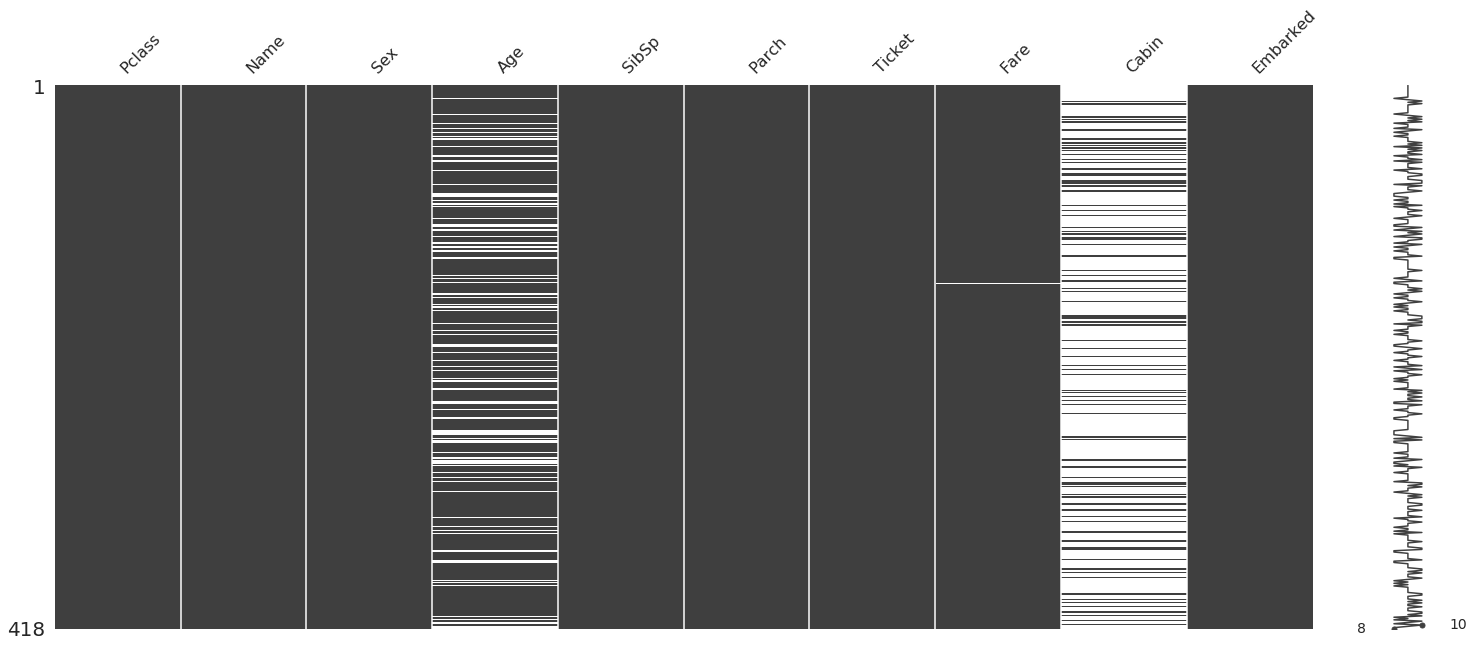

In [12]:
mn.matrix(test)

Data Visualisation

In [13]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

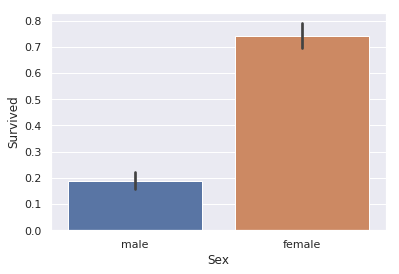

In [14]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

Its obvious that females are more likely to survive.

Sex is an essential feature

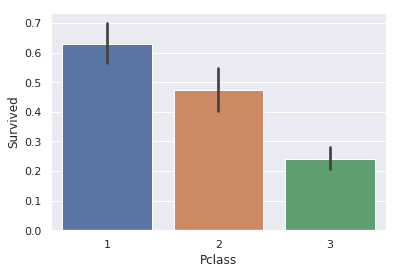

In [15]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

People of higher class have higher survival rate

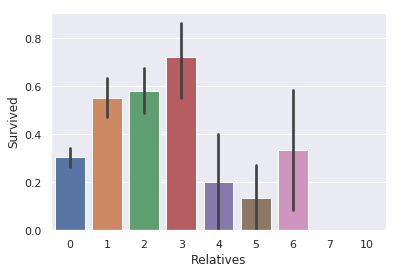

In [16]:
train['Relatives'] = 0
train['Relatives'] = train['SibSp'] + train['Parch']
sns.barplot(x = 'Relatives', y = 'Survived', data = train)

People with 1-3 relatives had more chances of survival, followed by people travelling alone, and then people with more than 4 relatives (which is obvious because they will have to travel as a group)

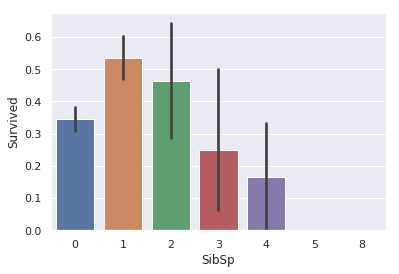

In [17]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)

People with more siblings are less likely to survive, but our assumption is wrong in case of 0 siblings, (maybe because people travelling alone are mostly in the age group of 20-45 and their lifeboats maybe postponed, we'll see this later)

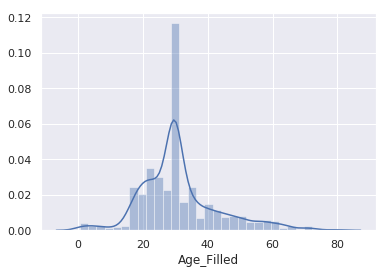

In [18]:
train['Age_Filled'] = train['Age'].fillna(train['Age'].mean())
sns.distplot(a = train['Age_Filled'][train['SibSp'] == 0],kde = True)

We can clearly see that people of age 20-40 mostly have no siblings

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Age_Filled
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0


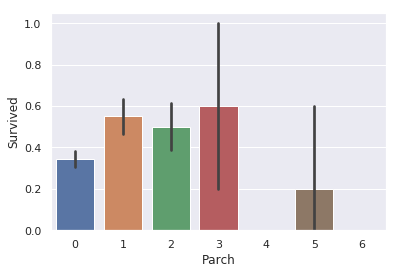

In [20]:
sns.barplot(x = 'Parch', y = 'Survived', data = train)

People with less than four parents or children aboard are more likely to survive than those with four or more

Age feature

<Figure size 3600x1440 with 0 Axes>

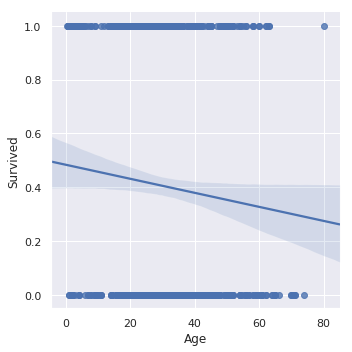

In [21]:
plt.figure(figsize = (50,20))
sns.lmplot(x = 'Age', y = 'Survived', data = train)

Survival rate decreases as Age increases.
Lets see more plots to confirm this

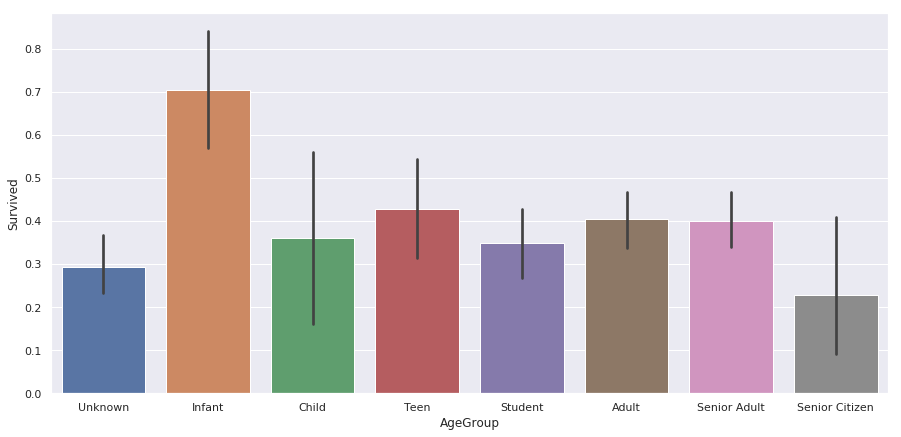

In [22]:
train['Age'] = train['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Infant', 'Child', 'Teen', 'Student', 'Adult', 'Senior Adult', 'Senior Citizen']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)

test['Age'] = test['Age'].fillna(-0.5)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

plt.figure(figsize = (15,7))
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Infants are more likely to survive than any other group.

So we can confirm that Survival decreases as Age increases.

Cabin Feature

The idea is that if Cabin is recorded, then they may belong to higher class.

In [23]:
train['Cabin_Bool'] = train["Cabin"].notnull().astype('int')
train['Cabin_Bool'].head()

PassengerId
1    0
2    1
3    0
4    1
5    0
Name: Cabin_Bool, dtype: int64

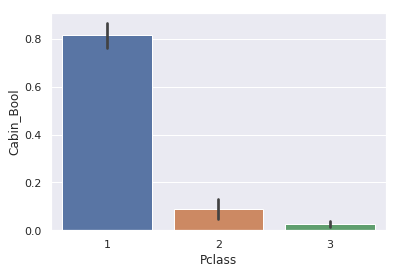

In [24]:
sns.barplot(x = train['Pclass'],y = train['Cabin_Bool'])

So the idea, that persons that belong to higher classes generally have their Cabin recorded is correct, so if it is missing then it is safe to assume that they either belong to either Pclass-2 or Pclass-3

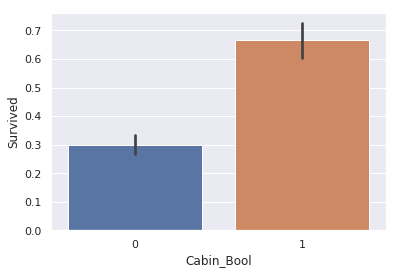

In [25]:
sns.barplot(x = train['Cabin_Bool'], y = train['Survived'])

The same point is enforced by this plot, those people who have their Cabin recorded are likely to belong to Pclass-1 and are obviously more likely to survive.

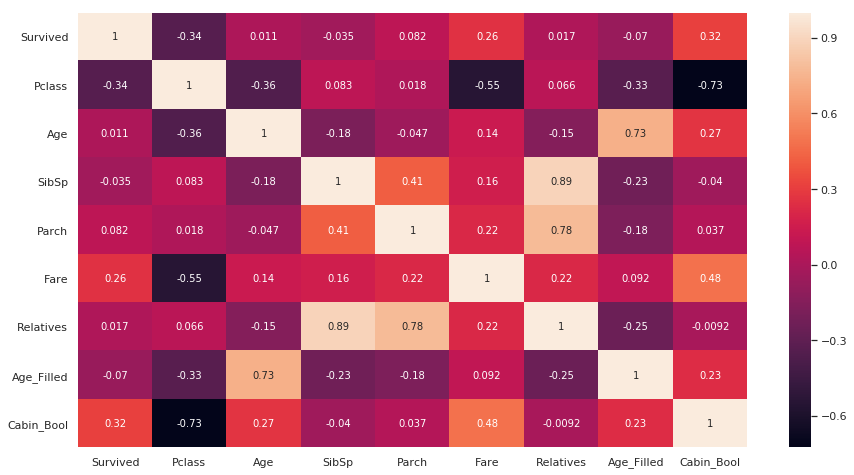

In [26]:
plt.figure(figsize = (15,8))
sns.heatmap(train.corr(), annot = True)

PClass, Age, SibSp & Relatives seem to be most important features, we'll comeback to this later again

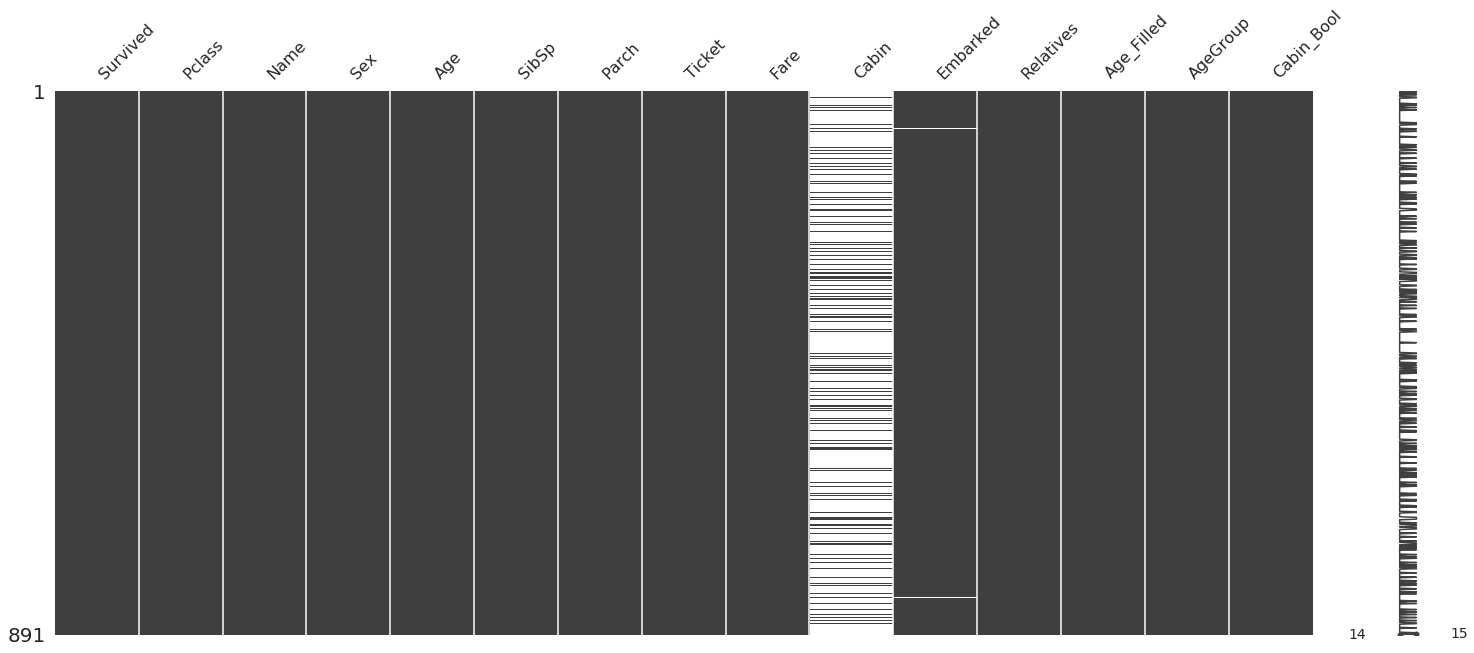

In [27]:
mn.matrix(train)

In my opinion, it is better to remove Cabin than filling it as there are so many missing values.

Cabin Feature

In [28]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)


In [29]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Relatives', 'Age_Filled', 'AgeGroup',
       'Cabin_Bool'],
      dtype='object')

In [30]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'AgeGroup'],
      dtype='object')

I'm also dropping Ticket beacuse it doesn't seem useful.

Ticket Feature

In [31]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [32]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Relatives', 'Age_Filled', 'AgeGroup', 'Cabin_Bool'],
      dtype='object')

In [33]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeGroup'],
      dtype='object')

Age Feature

In [34]:
train = train.drop(['Age_Filled','Cabin_Bool','Relatives'], axis = 1)
train.columns
#train.Name.head()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup'],
      dtype='object')

We can see that each name has a title like Mr., Miss., Miss. etc, we will see if we can use them to fill missing age values.

We can use a Regular Expression : <pre>" ([A-Za-z]+)\\."</pre> (As each title starts with a space(after ,) followed by 1 or more letters and ending with a period).

In [35]:

test.columns


Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeGroup'],
      dtype='object')

In [36]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup'],
      dtype='object')

In [37]:
s = set()
both = [train,test]

for df in both:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
for df in both:
    for title in df['Title']:
        s.add(title)
print(s)

{'Mr', 'Mme', 'Dona', 'Lady', 'Master', 'Major', 'Dr', 'Jonkheer', 'Rev', 'Miss', 'Mrs', 'Ms', 'Mlle', 'Countess', 'Col', 'Don', 'Sir', 'Capt'}


Lets plot these titles to survival rate

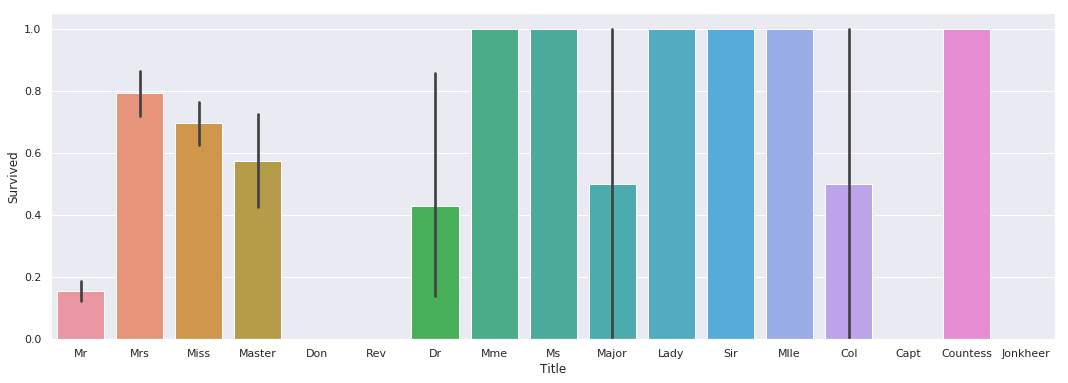

In [38]:
plt.figure(figsize = (18,6))
sns.barplot(x = train['Title'], y = train['Survived'])

In [39]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


We will replace (Countess, Lady, Sir) as 'Royal' as they are of very high class.

Similarly (Mlle,Ms) to Miss and Mme to Mrs

Unknwon titles are grouped to 'Others'

In [40]:
for df in both:
    df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Others')
    
    df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [41]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.285714
5,Royal,1.000000


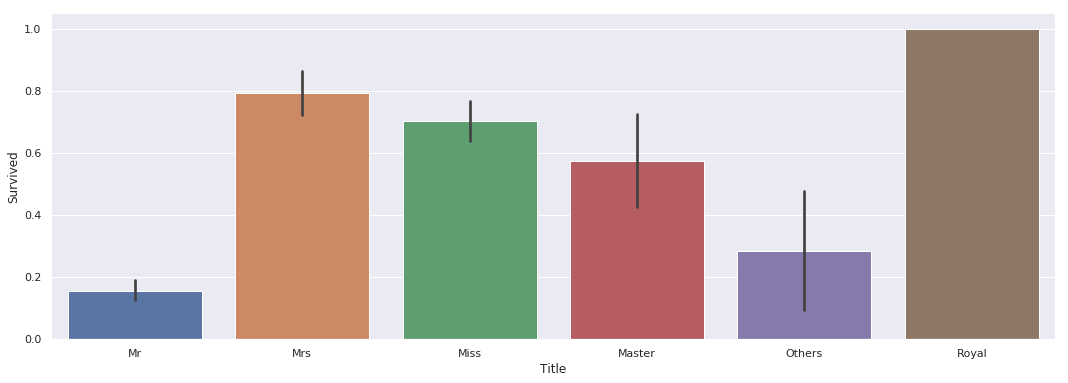

In [42]:
plt.figure(figsize = (18,6))
sns.barplot(x = train['Title'], y = train['Survived'])

Lets map these numerical values to titles

In [43]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Others": 6}
for df in both:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Senior Adult,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,1


Now predicting the missing ages with the title information

In [44]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Senior Adult,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,1


In [45]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Adult,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Senior Adult,3
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Senior Citizen,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Adult,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Student,3


In [46]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Senior Adult,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,1
6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,Unknown,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Senior Adult,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Infant,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Adult,3


In [47]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Senior Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Infant
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Senior Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Senior Adult

age_title_mapping = {1: 'Adult', 2: 'Student', 3: 'Senior Adult', 4: 'Infant', 5: 'Senior Adult', 6: 'Senior Adult'}

In [48]:
train = train.fillna({"AgeGroup": train["Title"].map(age_title_mapping)})
test = test.fillna({"AgeGroup": test["Title"].map(age_title_mapping)})

In [49]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup', 'Title'],
      dtype='object')

In [50]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeGroup', 'Title'],
      dtype='object')

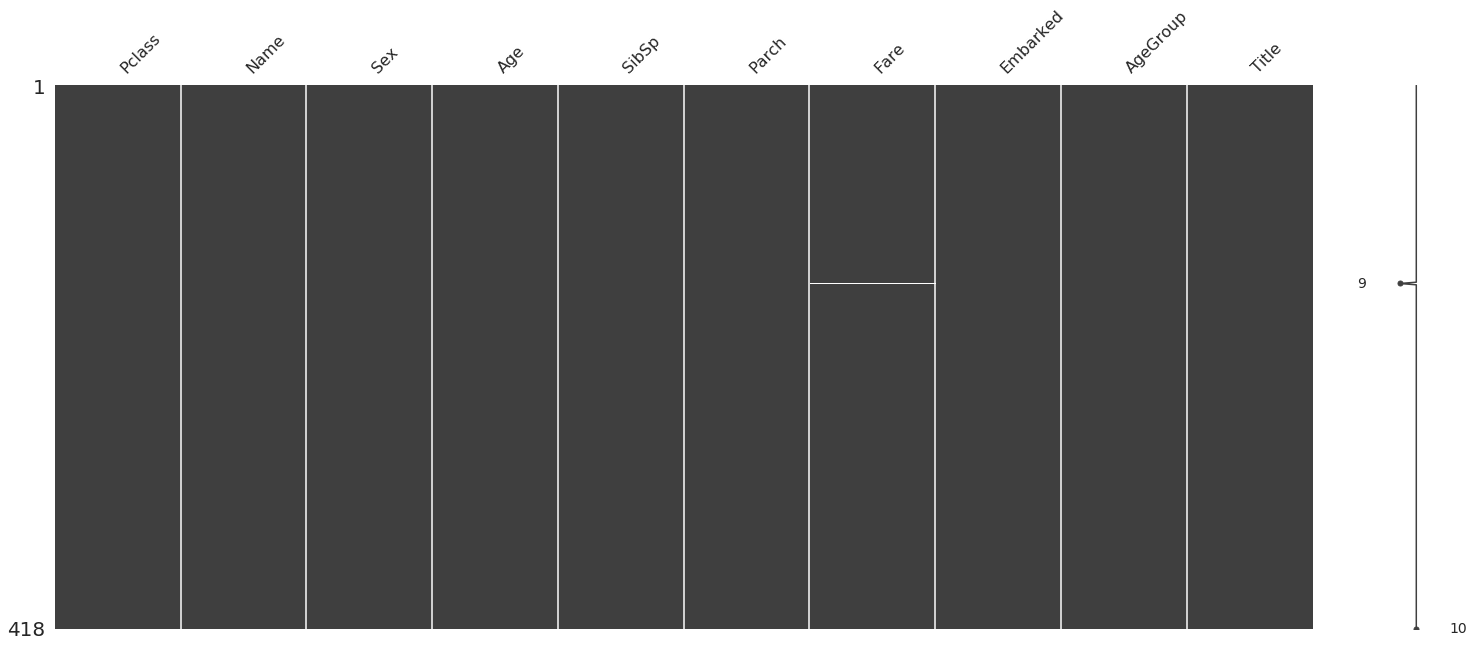

In [51]:
mn.matrix(test)

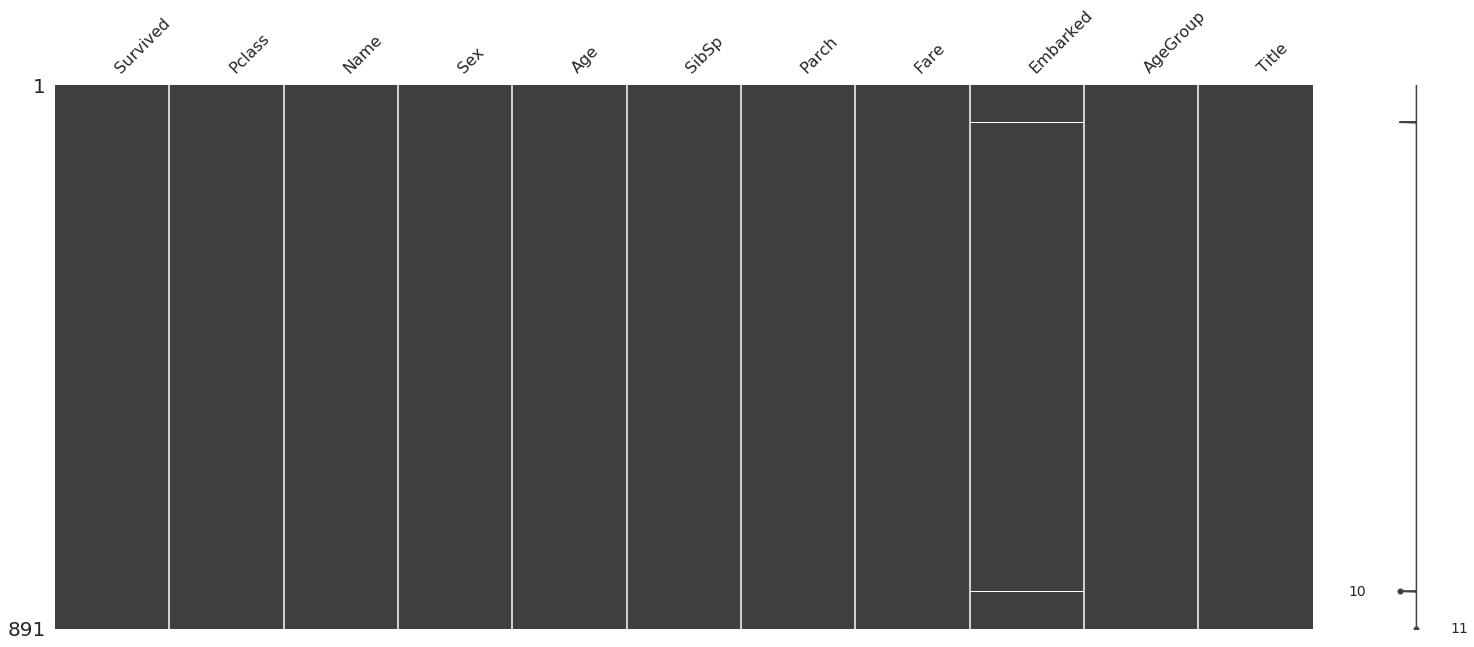

In [52]:
mn.matrix(train)

So, we have filled the Age values, lets map them to numerical values

In [53]:
age_mapping = {'Infant': 1, 'Child': 2, 'Teen': 3, 'Student': 4, 'Adult': 5, 'Senior Adult': 6, 'Senior Citizen': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)
train.AgeGroup

PassengerId
1      5.0
2      6.0
3      4.0
4      6.0
5      5.0
      ... 
887    6.0
888    4.0
889    4.0
890    5.0
891    5.0
Name: AgeGroup, Length: 891, dtype: float64

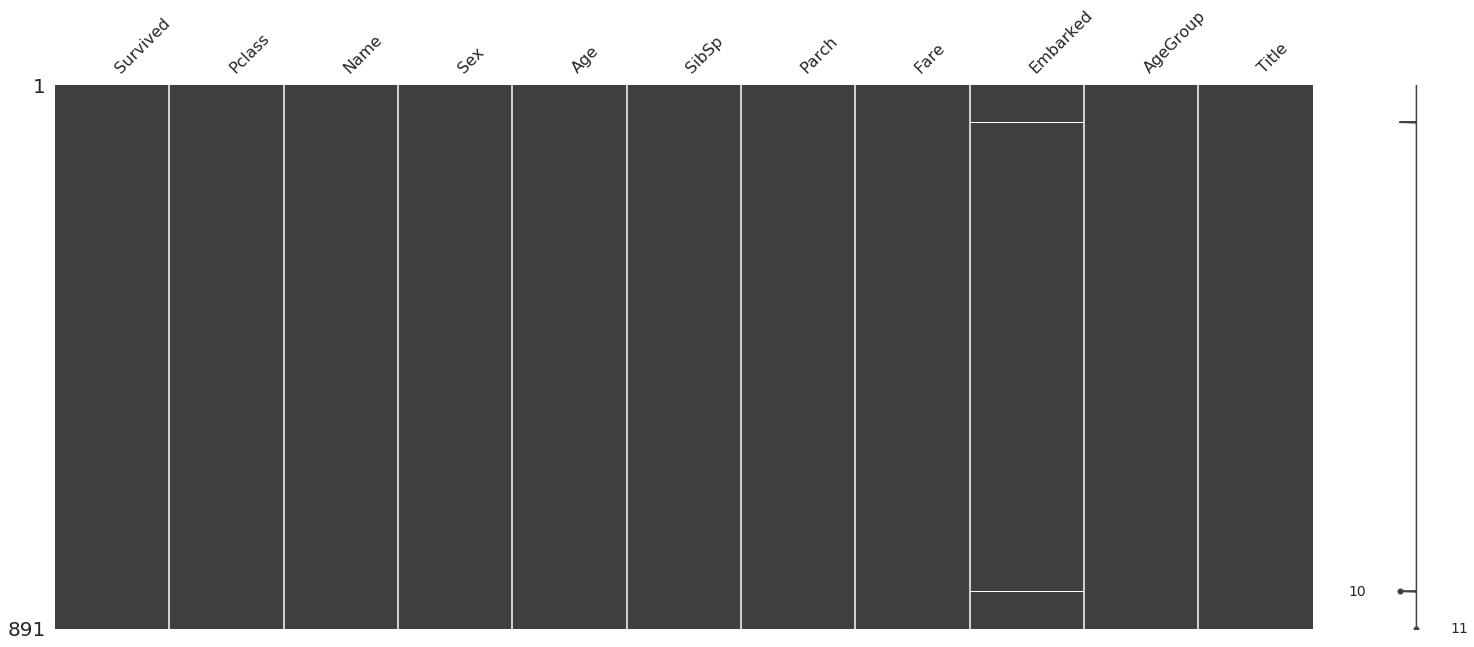

In [54]:
mn.matrix(train)

In [55]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,4.0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,6.0,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,1


Dropping Age

In [56]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

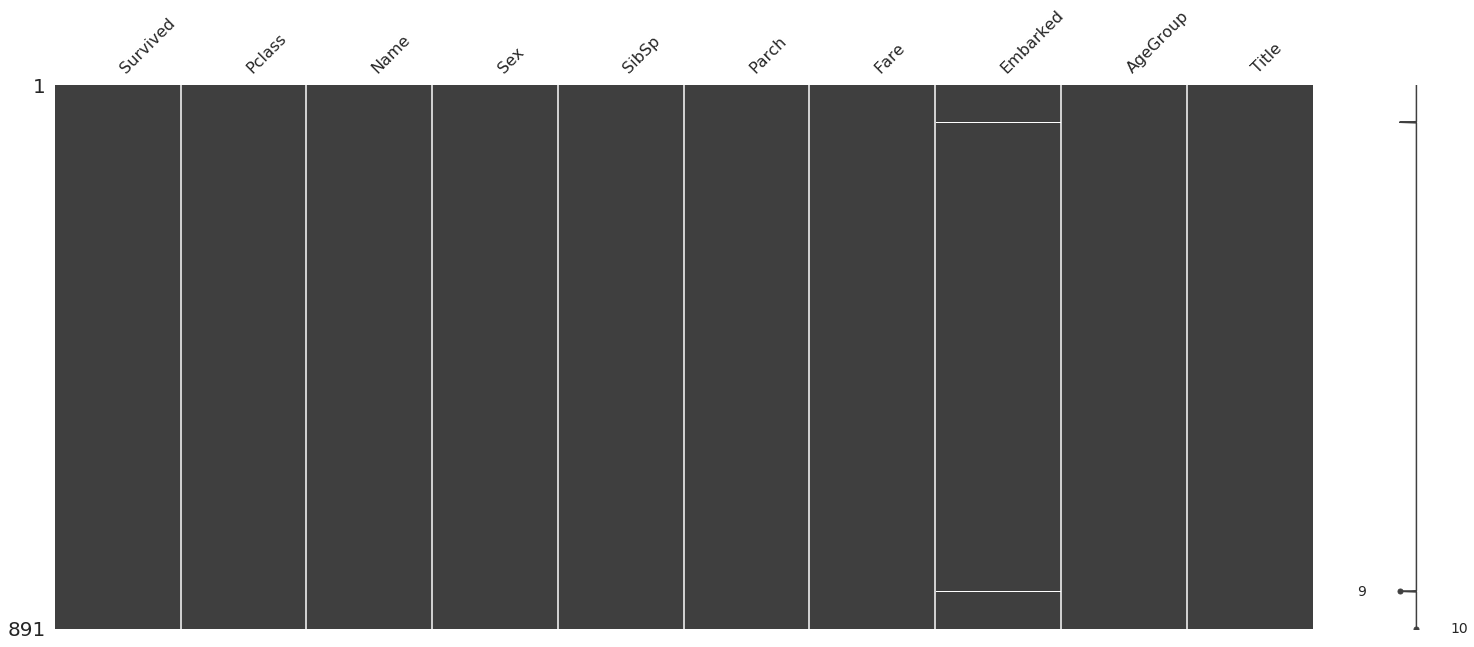

In [57]:
mn.matrix(train)

In [58]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,5.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,3
3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,4.0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,6.0,3
5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,1


Name Feature

Dropping it, not useful anymore

In [59]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [60]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,
1,0,3,male,1,0,7.2500,S,5.0,1
2,1,1,female,1,0,71.2833,C,6.0,3
3,1,3,female,0,0,7.9250,S,4.0,2
4,1,1,female,1,0,53.1000,S,6.0,3
5,0,3,male,0,0,8.0500,S,5.0,1


Sex Feature

Mapping Sex to numerical values.

In [61]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
PassengerId,,,,,,,,,
1,0,3,0,1,0,7.2500,S,5.0,1
2,1,1,1,1,0,71.2833,C,6.0,3
3,1,3,1,0,0,7.9250,S,4.0,2
4,1,1,1,1,0,53.1000,S,6.0,3
5,0,3,0,0,0,8.0500,S,5.0,1


Embarked Feature

In [62]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Lets fill missing values with S as it is majority.

In [63]:
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})

In [64]:
train.Fare.isnull().sum()

0

In [65]:
'''for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)'''
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])


train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [66]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
PassengerId,,,,,,,,,
1,0,3,0,1,0,S,5.0,1,1
2,1,1,1,1,0,C,6.0,3,4
3,1,3,1,0,0,S,4.0,2,2
4,1,1,1,1,0,S,6.0,3,4
5,0,3,0,0,0,S,5.0,1,2


In [67]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
PassengerId,,,,,,,,
892,3,0,0,0,Q,5.0,1,1
893,3,1,1,0,S,6.0,3,1
894,2,0,0,0,Q,5.0,1,2
895,3,0,0,0,S,5.0,1,2
896,3,1,1,1,S,6.0,3,2


Converting Embarked feature into numberical values

In [68]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
PassengerId,,,,,,,,,
1,0,3,0,1,0,1,5.0,1,1
2,1,1,1,1,0,2,6.0,3,4
3,1,3,1,0,0,1,4.0,2,2
4,1,1,1,1,0,1,6.0,3,4
5,0,3,0,0,0,1,5.0,1,2


**MODELING**

In [69]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis = 1)
y = train['Survived']

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)

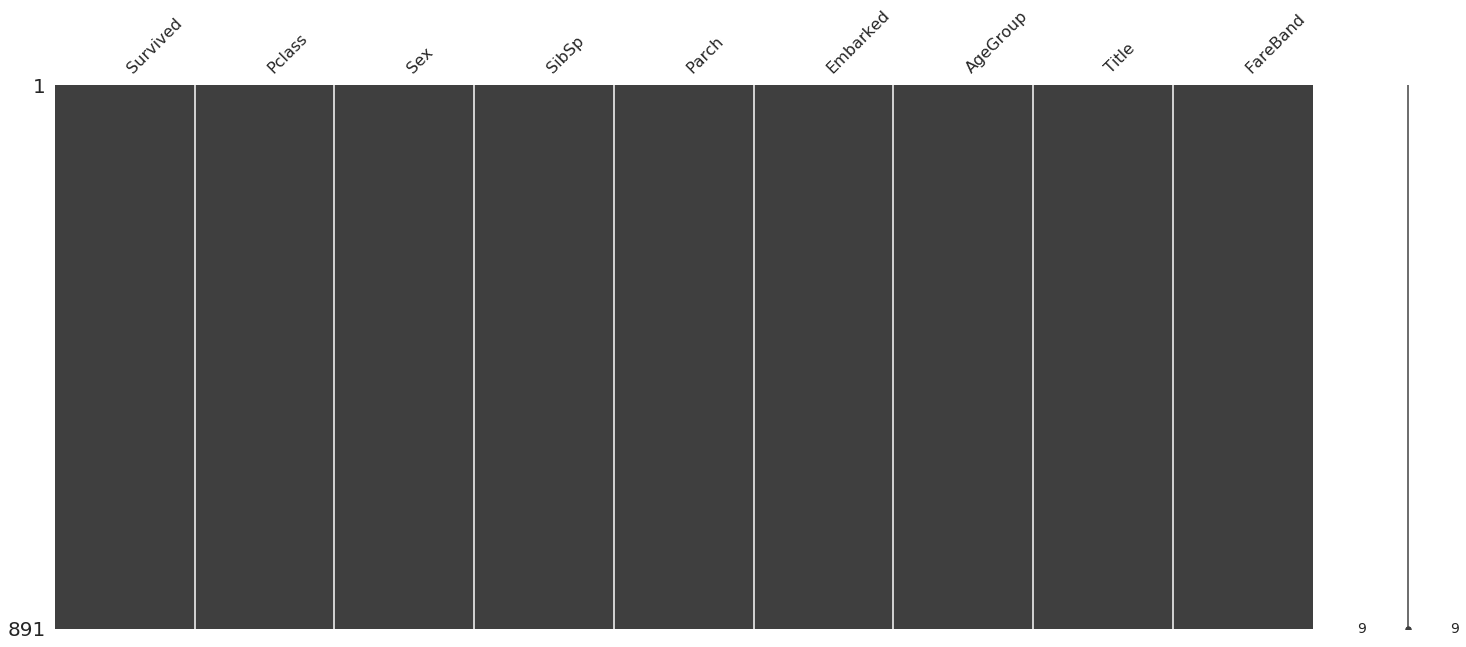

In [70]:
mn.matrix(train)

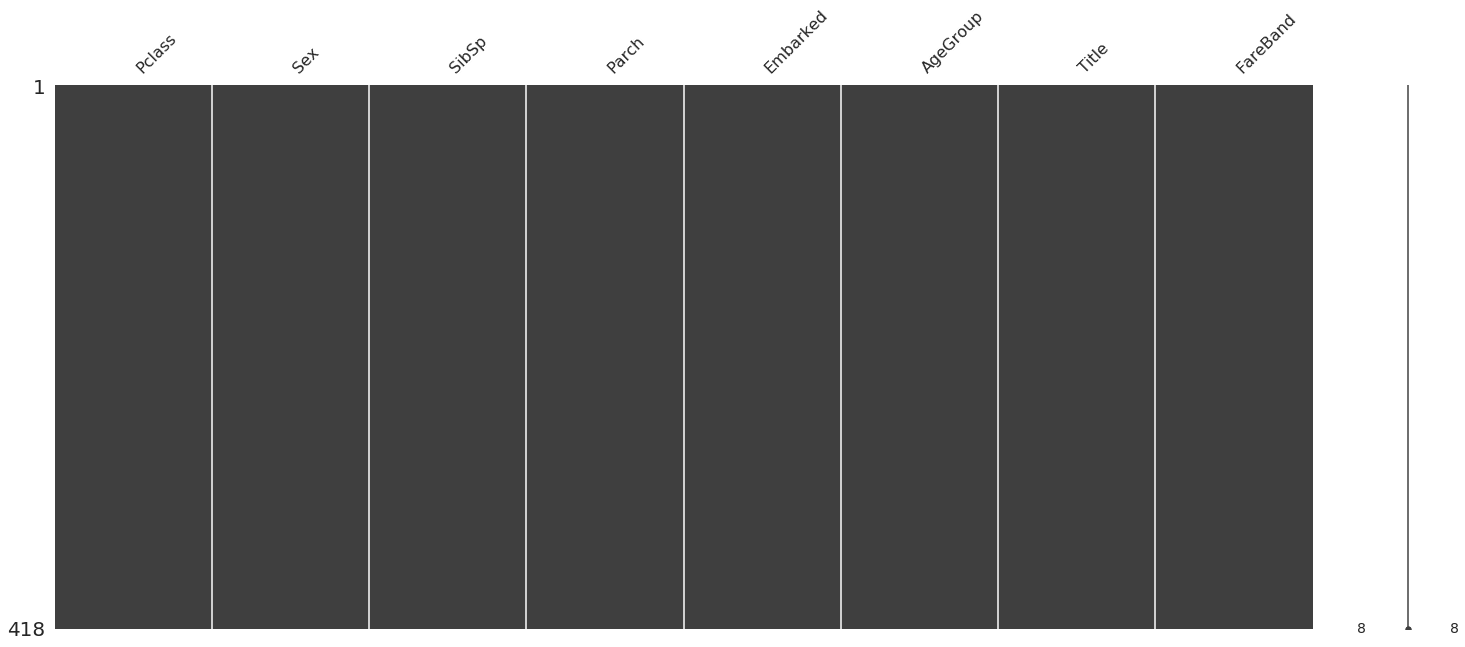

In [71]:
mn.matrix(test)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
''''''
dt = DecisionTreeClassifier(random_state = 1, max_leaf_nodes = 10)
dt.fit(train_X, train_y)
pred_vals = dt.predict(val_X)
acc_dt = round(accuracy_score(pred_vals, val_y) * 100, 2)
print(acc_dt)

82.51


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(train_X, train_y)
pred_vals = rf.predict(val_X)
acc_rf = round(accuracy_score(pred_vals, val_y) * 100, 2)
print(acc_rf)

82.51


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Testing**

In [74]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
PassengerId,,,,,,,,
892,3,0,0,0,3,5.0,1,1
893,3,1,1,0,1,6.0,3,1
894,2,0,0,0,3,5.0,1,2
895,3,0,0,0,1,5.0,1,2
896,3,1,1,1,1,6.0,3,2


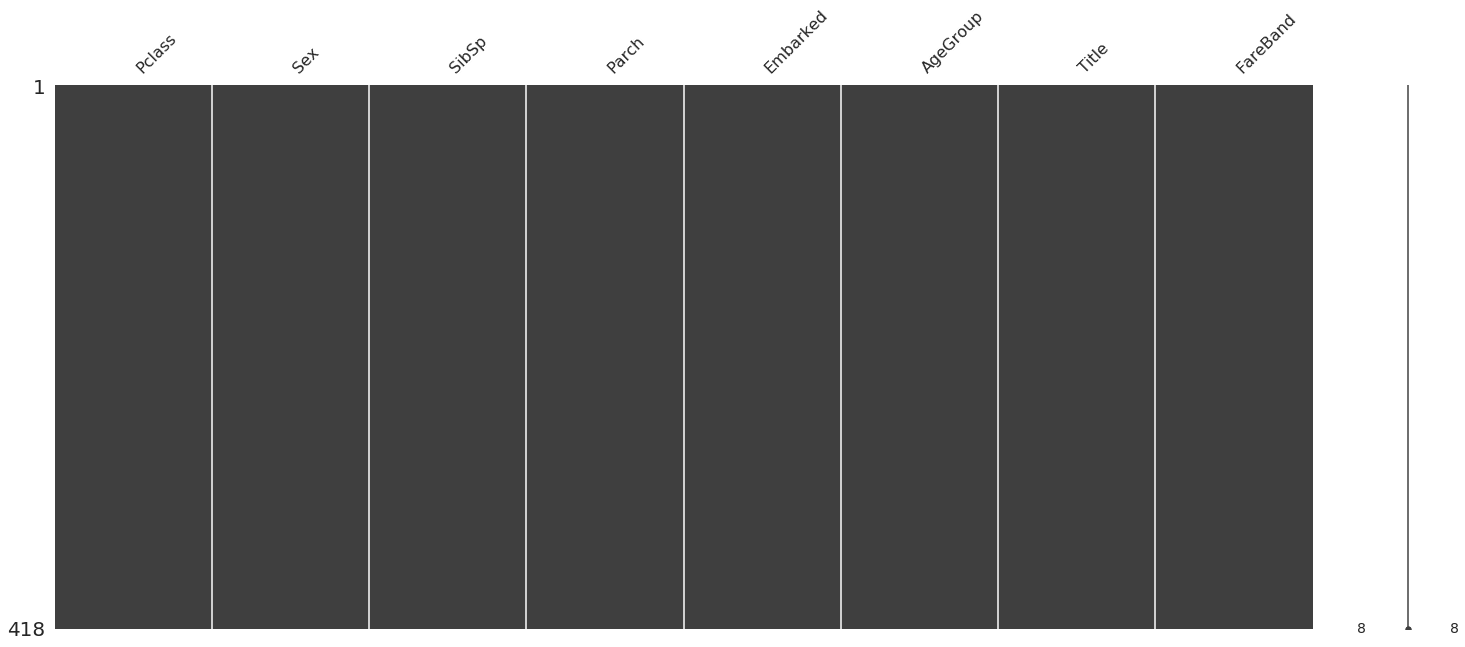

In [75]:
mn.matrix(test)


In [76]:
ids = test.index
predictions = rf.predict(test)

In [77]:
output = pd.DataFrame({'PassengerId' : ids, 'Survived' : predictions})
output.to_csv('submission.csv',index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [78]:
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
